<h1 style = "text-align:center; font-size:300%">Home Loan Approval Prediction</h1>

---

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')

import warnings 
warnings.filterwarnings('ignore')

# Loading & Inspecting Data

In [2]:
data = pd.read_csv('Modified_Loan_Data.csv')

In [3]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Dependents,Zero,One,Zero,Zero,Zero,Two,Zero,Three or more,Two,Two
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,3200
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,700.0
LoanAmount,128.0,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,70.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0
Credit_History,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes


In [4]:
# Getting information about each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             590 non-null    object 
 1   Married            590 non-null    object 
 2   Dependents         590 non-null    object 
 3   Education          590 non-null    object 
 4   Self_Employed      590 non-null    object 
 5   ApplicantIncome    590 non-null    int64  
 6   CoapplicantIncome  590 non-null    float64
 7   LoanAmount         590 non-null    float64
 8   Loan_Amount_Term   590 non-null    float64
 9   Credit_History     590 non-null    object 
 10  Property_Area      590 non-null    object 
 11  Loan_Status        590 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 55.4+ KB


# Some Statistical information

In [5]:
# change float format in data
pd.options.display.float_format = '{:,.0f}'.format

In [6]:
# Creating a descriptive statistics table for numerical data
data.describe(include = 'number')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,590,590,590,590
mean,"4,774","1,386",139,344
std,"3,150","1,601",70,60
min,150,0,9,60
25%,"2,875",0,100,360
50%,"3,756","1,188",128,360
75%,"5,690","2,250",160,360
max,"19,730","7,873",600,480


In [7]:
# Creating a descriptive statistics table for categorical data
data.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,590,590,590,590,590,590,590,590
unique,2,2,4,2,2,2,3,2
top,Male,Yes,Zero,Graduate,No,Yes,Semiurban,Yes
freq,481,386,348,457,511,505,223,409


---

# Exploratory Data Analysis (EDA)

* **Univariate Analysis**
* **Bi-variate Analysis**
* **Multi-variate Analysis**

## 1. Univariate Analysis

### 1.1.  Numerical Features

In [8]:
# Creating a list including the names of numerical data
num_features = data.select_dtypes(include='number').columns.tolist()

print(f'Numerical Features: {num_features}')

Numerical Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


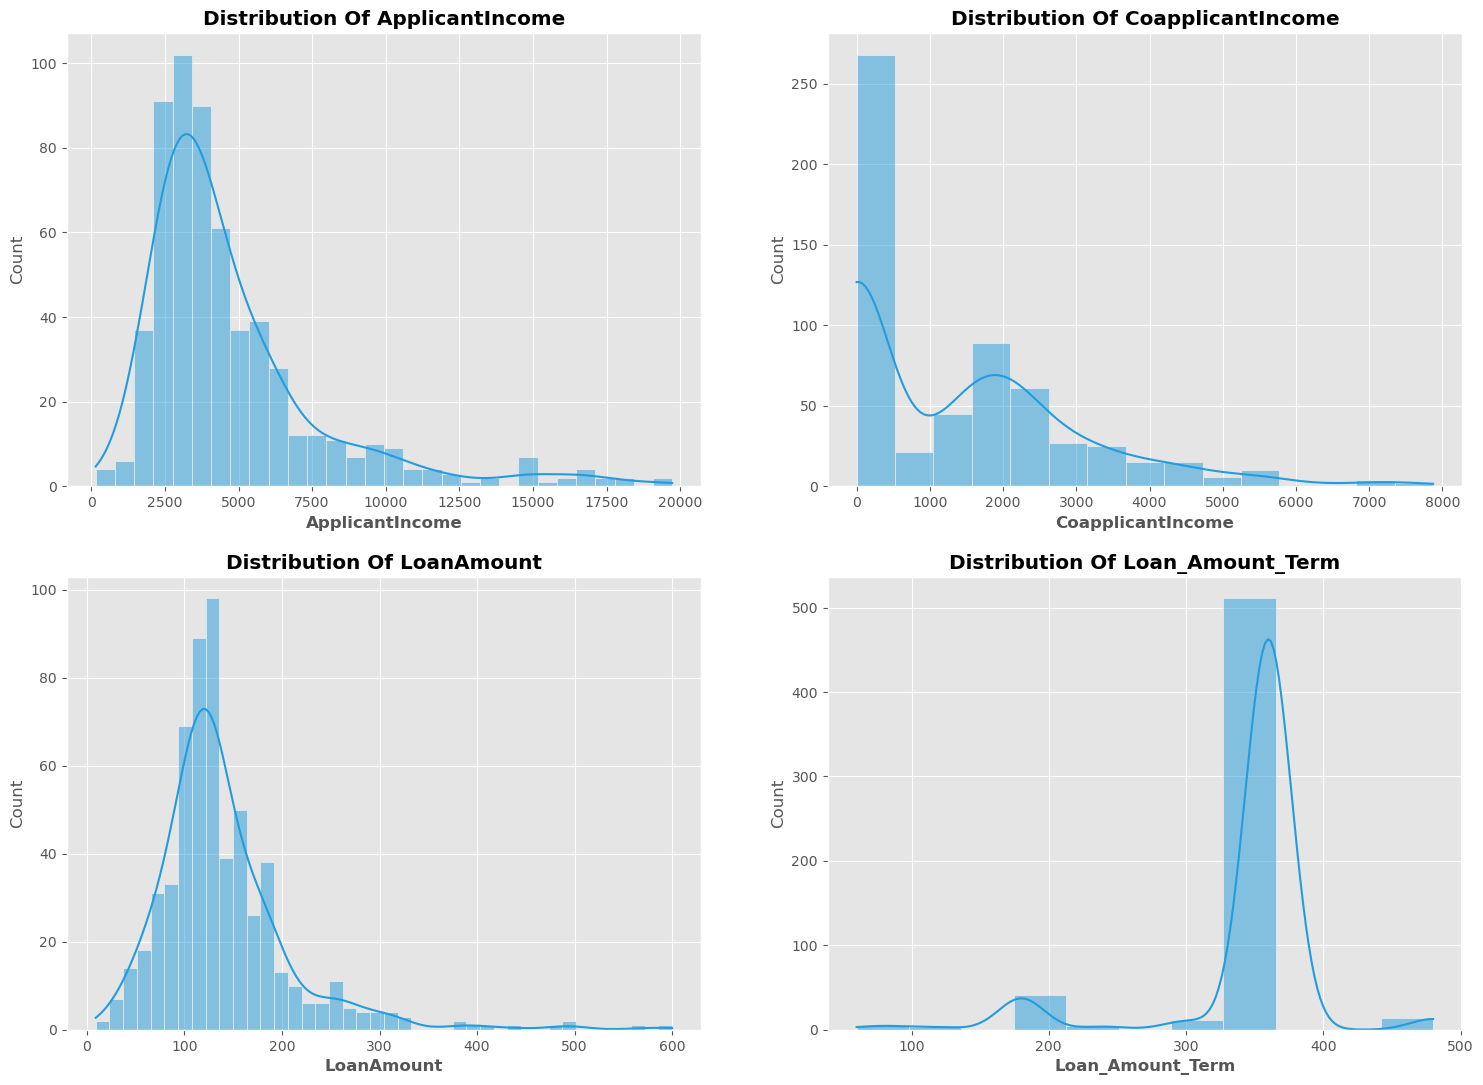

In [9]:
# Drawing a histogram to display the distribution of each numerical column
plt.figure(figsize = (18, 20))
for i, col in enumerate(num_features):
    plt.subplot((len(num_features) // 2) + 1, 2, i+1)
    sns.histplot(data = data, x = col, kde = True, color = '#229CDD')
    plt.title(f'Distribution Of {col}', weight="bold")
    plt.xlabel(col, weight="bold")
plt.show()

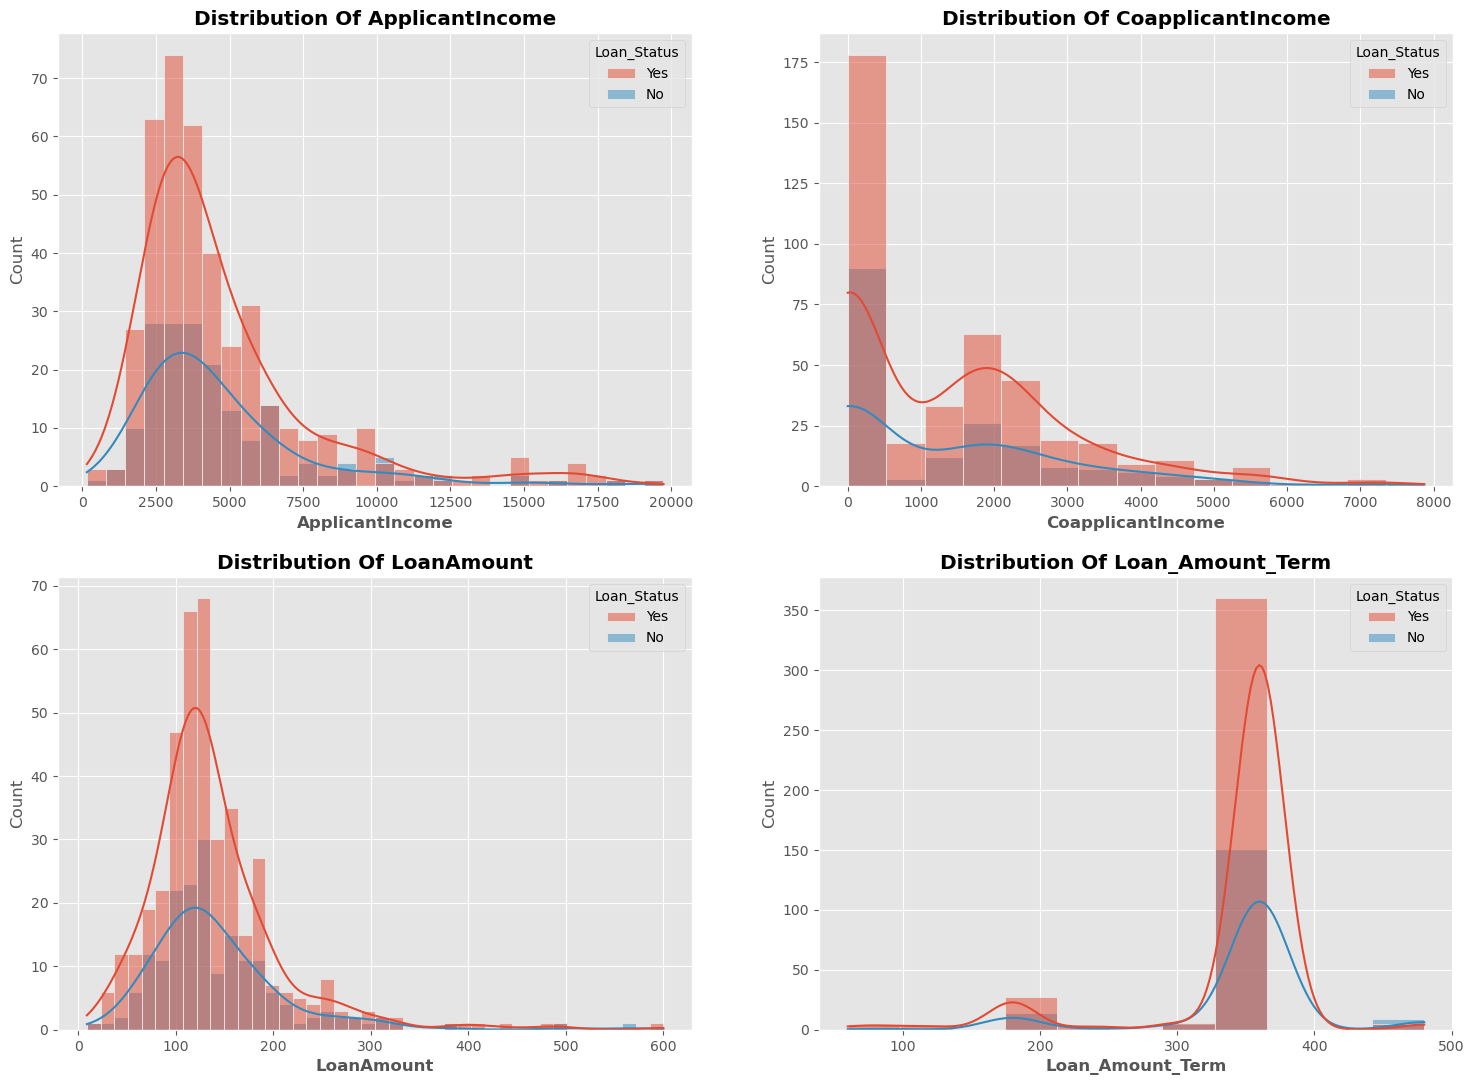

In [10]:
# Create a function to draw a histogram to display the distribution of each numerical column based on loan status
plt.figure(figsize = (18, 20))
for i, col in enumerate(num_features):
    plt.subplot((len(num_features) // 2) + 1, 2, i+1)
    sns.histplot(data = data, x = col, hue = 'Loan_Status', kde = True)
    plt.title(f'Distribution Of {col}', weight="bold")
    plt.xlabel(col, weight="bold")
plt.show()

**Observations:** 
> The distributions are right-skewed (positively skewed).

### 1.2. Categorical Features

In [11]:
# Creating a list including the names of categorical data
cat_features = data.select_dtypes(include = 'object').columns.tolist()
cat_features.remove('Loan_Status')

print(f'Categorical Features: {cat_features}')

Categorical Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


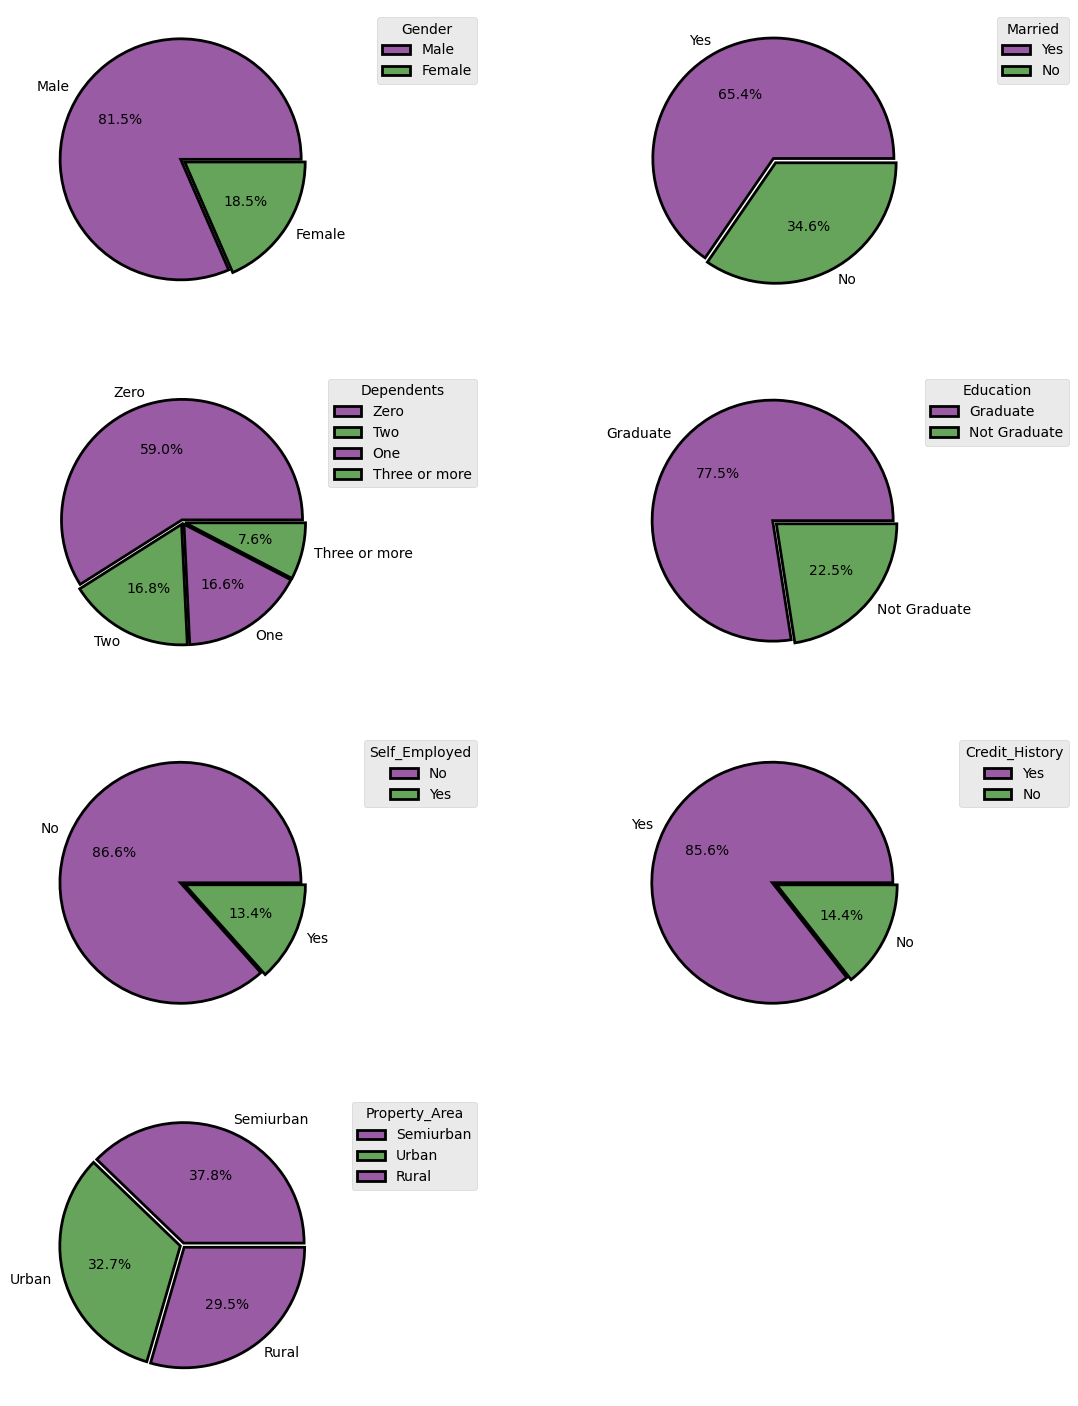

In [12]:
colors = ['#995BA4', '#66A45B']

# Drawing a pie plot to display the distribution of each categorical column
plt.figure(figsize = (14, 18))
for i, col in enumerate(cat_features):
    plt.subplot(4, 2, i+1)
    plt.pie(x = data[col].value_counts().values, 
            labels = data[col].value_counts().index, 
            autopct = '%1.1f%%',
            colors = colors[0: len(data[col].value_counts().index)],
            explode = (0.02,) * len(data[col].unique()),
            wedgeprops = {'edgecolor': 'black', 'linewidth': 2, 'antialiased': True})
    plt.legend(title=col, loc="best", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**Observations:** 
* Most of the customers applying for the loan are male.
* Most of the customers applying for the loan are married.
* Most of the customers applying for the loan are graduates.
* Most of the customers applying for the loan are self-employed.
* Most of the customers applying for the loan don't have dependents.
* Most of the customers applying for the loan have a credit history.
* Most loans the customers applying in the Semi-urban area.

### 1.3. Loan Status (Target Column)

In [13]:
data['Loan_Status'].value_counts()

Loan_Status
Yes    409
No     181
Name: count, dtype: int64

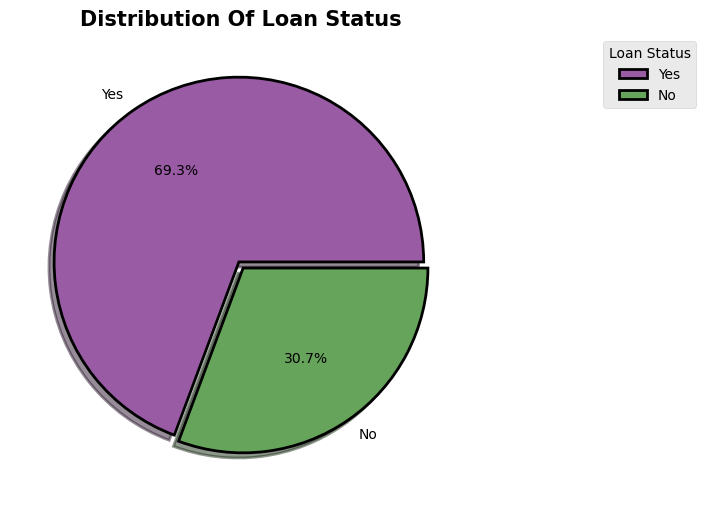

In [14]:
colors = ['#995BA4', '#66A45B']

plt.figure(figsize = (12, 6))

plt.pie(x = data['Loan_Status'].value_counts().values, 
          labels = data['Loan_Status'].value_counts().index,
          shadow = True,
          colors = colors,
          autopct = '%1.1f%%',
          explode = (0.02,) * len(data['Loan_Status'].unique()),
          wedgeprops = {'edgecolor': 'black', 'linewidth': 2, 'antialiased': True})

plt.legend(title="Loan Status", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title(f'Distribution Of Loan Status', size = 15, weight='bold')
plt.show()

**Observations:** 
> Almost 70% of the customers have taken out the Loan.

## 2. Bi-variate Analysis

### 2.1. What is the impact of Gender on Loan Status?

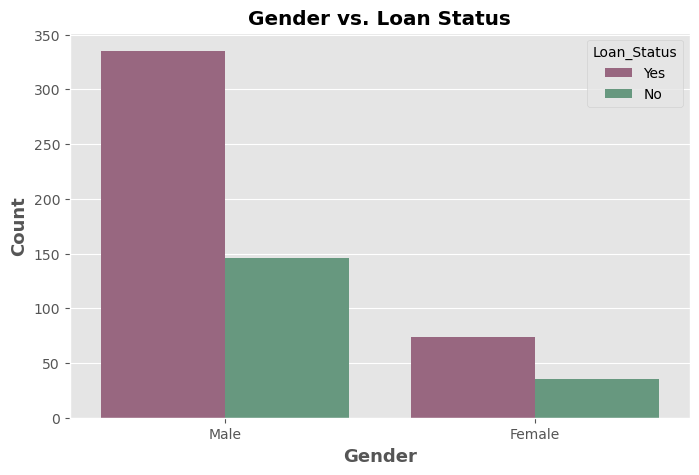

In [15]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'Gender',
              hue = 'Loan_Status', 
              palette = ['#A05F80', '#5FA07F'])


# Add labels and title
plt.title('Gender vs. Loan Status', weight = 'bold')
plt.xlabel('Gender', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> The loan approval and rejection cases are nearly similar in the case of both Males and Females, so this feature doesn't impact the Loan Status.

### 2.2. What is the impact of Married on Loan Status?

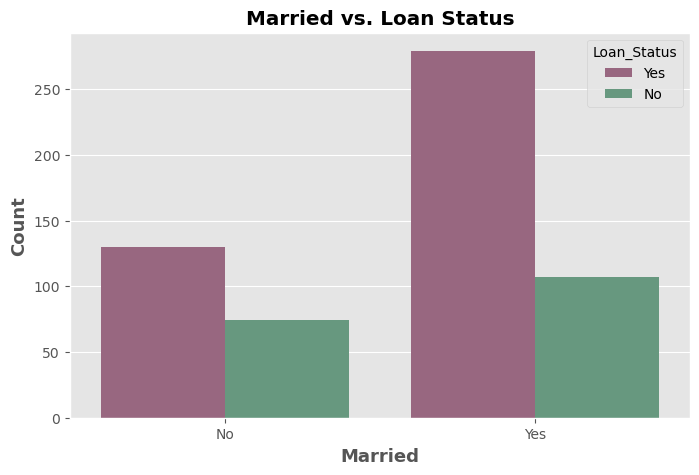

In [16]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'Married',
              hue = 'Loan_Status', 
              palette = ['#A05F80', '#5FA07F'])


# Add labels and title
plt.title('Married vs. Loan Status', weight = 'bold')
plt.xlabel('Married', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> The highest number of loans were applied for the customers that are Married.

### 2.3.What is the impact of Education on Loan Status?

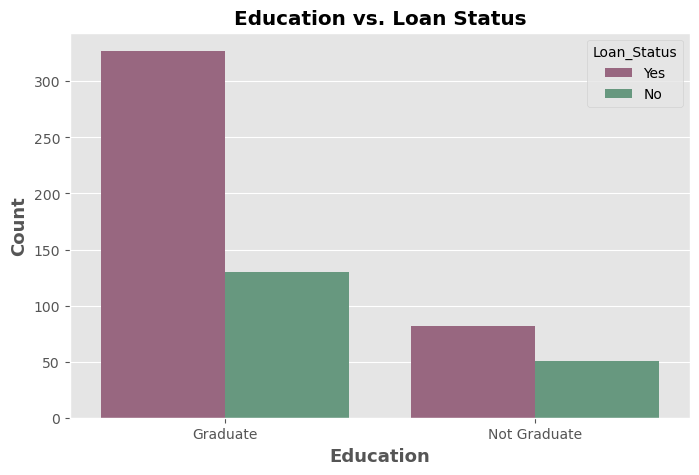

In [17]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'Education',
              hue = 'Loan_Status',
              palette = ['#A05F80', '#5FA07F'])


# Add labels and title
plt.title('Education vs. Loan Status', weight = 'bold')
plt.xlabel('Education', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> The Loan approval and rejection cases are nearly similar for both Graduates and Non-Graduates, so this feature doesn't impact the Loan Status.

### 2.4. What is the impact of Self Employed on Loan Status?

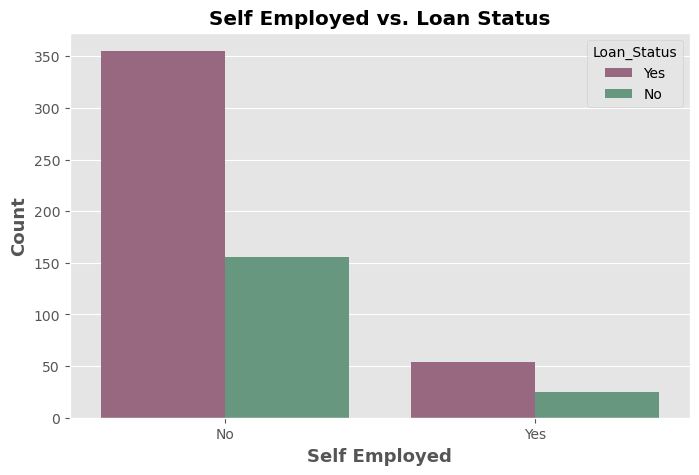

In [18]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'Self_Employed',
              hue = 'Loan_Status',
              palette = ['#A05F80', '#5FA07F'])


# Add labels and title
plt.title('Self Employed vs. Loan Status', weight = 'bold')
plt.xlabel('Self Employed', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> The Loan approval and rejection cases are nearly similar for both Self-Employed and Non-Self-Employed, so this feature doesn't impact the Loan Status.

### 2.5. What is the impact of having Dependents on Loan Status?

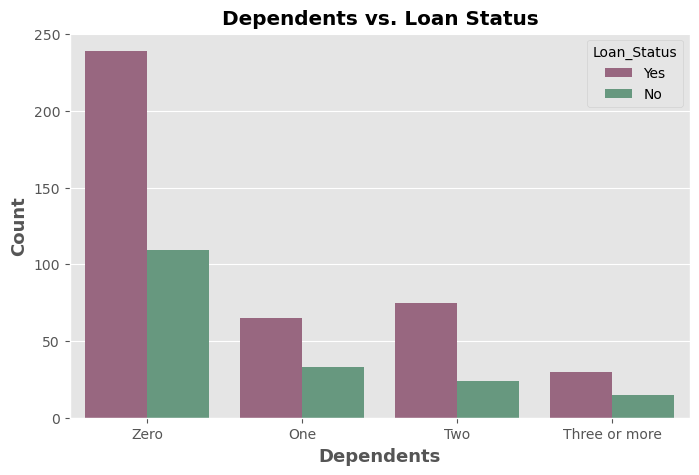

In [19]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'Dependents',
              hue = 'Loan_Status', 
              palette = ['#A05F80', '#5FA07F'])


# Add labels and title
plt.title('Dependents vs. Loan Status', weight = 'bold')
plt.xlabel('Dependents', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> The loan approval and rejection cases are nearly similar in the case of having dependents or not, so this feature doesn't impact the Loan Status.

### 2.6. What is the impact of  Property_Area on Loan Status?

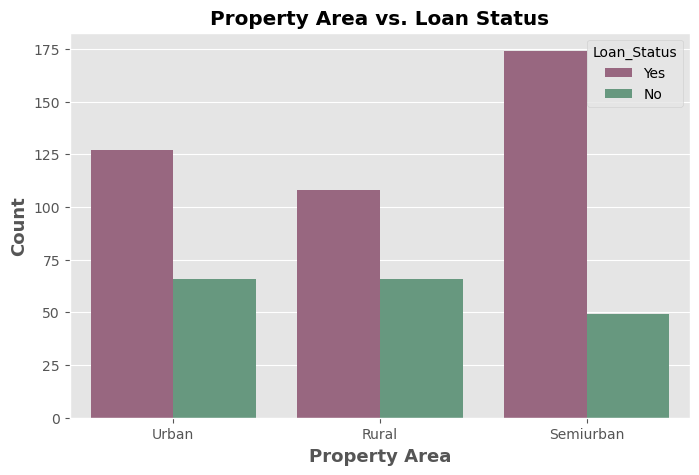

In [20]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'Property_Area',
              hue = 'Loan_Status',
              palette = ['#A05F80', '#5FA07F'])


# Add labels and title
plt.title('Property Area vs. Loan Status', weight = 'bold')
plt.xlabel('Property Area', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observations:**
> The highest number of loans were applied in the Semi-urban area, followed by Urban and Rural areas.

### 2.7. What is the impact of Credit History on Loan Status?

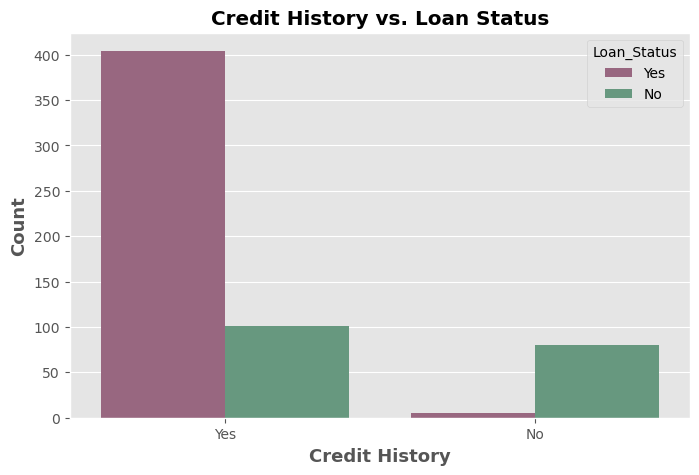

In [21]:
plt.figure(figsize = (8, 5))
sns.countplot(data = data, 
              x = 'Credit_History',
              hue = 'Loan_Status',
              palette = ['#A05F80', '#5FA07F'])


# Add labels and title
plt.title('Credit History vs. Loan Status', weight = 'bold')
plt.xlabel('Credit History', size = 13, weight = 'bold')
plt.ylabel('Count', size = 13, weight = 'bold')
plt.show()

**Observations:**  
> For Credit History, we can see the loan approvals are more in the case of applicants having a Credit History, and rejection of applicants that have no Credit History. So, this feature (Credit History) has a significant impact on Loan Status.

### 2.8. What is the impact of Loan Amount on Loan Status?

In [22]:
data.groupby('Loan_Status')['LoanAmount'].mean()

Loan_Status
No    143
Yes   138
Name: LoanAmount, dtype: float64

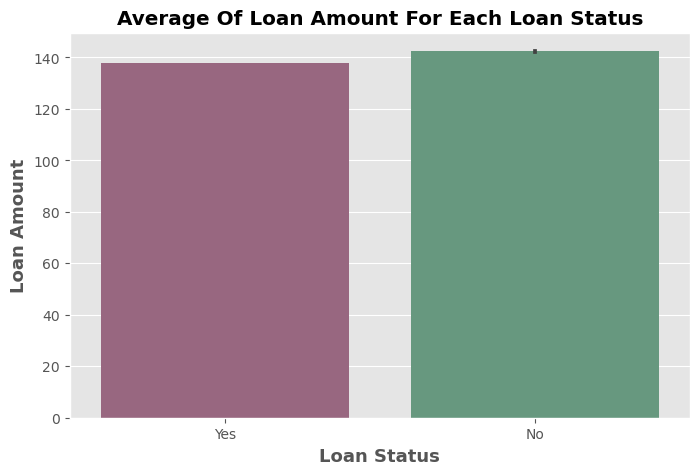

In [23]:
plt.figure(figsize = (8, 5))
sns.barplot(data = data, 
            x = 'Loan_Status',
            y = 'LoanAmount',
            palette = ['#A05F80', '#5FA07F'],
            ci = True)


# Add labels and title
plt.title('Average Of Loan Amount For Each Loan Status', weight = 'bold')
plt.xlabel('Loan Status', size = 13, weight = 'bold')
plt.ylabel('Loan Amount', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> Loan Amount doesn't have an impact on the approval and rejection cases.

### 2.9. What is the impact of Applicant Income on Loan Status?

In [24]:
data.groupby('Loan_Status')['ApplicantIncome'].median()

Loan_Status
No    3,800
Yes   3,750
Name: ApplicantIncome, dtype: float64

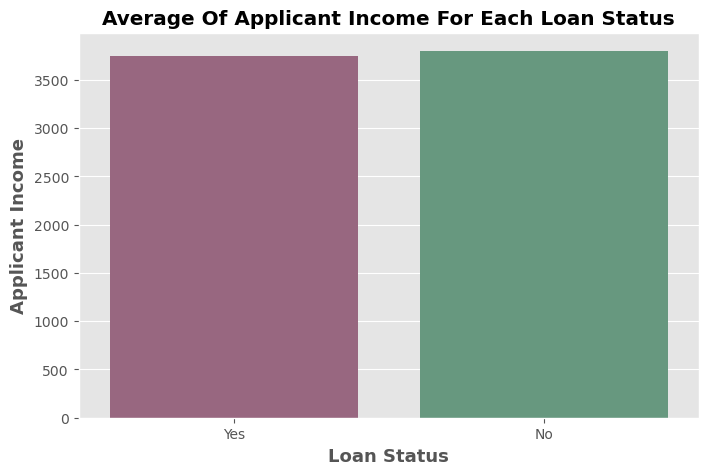

In [25]:
plt.figure(figsize = (8, 5))
sns.barplot(data = data, 
            x = 'Loan_Status',
            y = 'ApplicantIncome', 
            estimator = np.median,
            palette = ['#A05F80', '#5FA07F'],
            ci = False)

# Add labels and title
plt.title('Average Of Applicant Income For Each Loan Status', weight = 'bold')
plt.xlabel('Loan Status', size = 13, weight = 'bold')
plt.ylabel('Applicant Income', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> Applicant's Income doesn't have an impact on loan approval and rejection cases.

### 2.10. What is the impact of Co-applicant Income on Loan Status?

In [26]:
data.groupby('Loan_Status')['CoapplicantIncome'].median()

Loan_Status
No      536
Yes   1,229
Name: CoapplicantIncome, dtype: float64

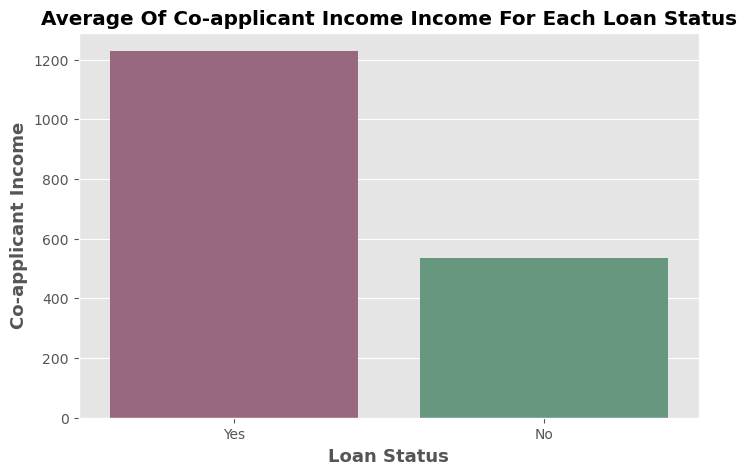

In [27]:
plt.figure(figsize = (8, 5))
sns.barplot(data = data, 
            x = 'Loan_Status',
            y = 'CoapplicantIncome',
            estimator = np.median,
            palette = ['#A05F80', '#5FA07F'],
            ci = False)

# Add labels and title
plt.title('Average Of Co-applicant Income Income For Each Loan Status', weight = 'bold')
plt.xlabel('Loan Status', size = 13, weight = 'bold')
plt.ylabel('Co-applicant Income', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> Co-applicant's Income has an impact on loan approval and rejection cases, as the higher the income of the Co-applicants, the higher the percentage of loan approval. So, this feature (Co-applicant income) has a significant impact on Loan Status.

### 2.11. What is the impact of Loan Amount Term on Loan Status?

In [28]:
data.groupby('Loan_Status')['Loan_Amount_Term'].median()

Loan_Status
No    360
Yes   360
Name: Loan_Amount_Term, dtype: float64

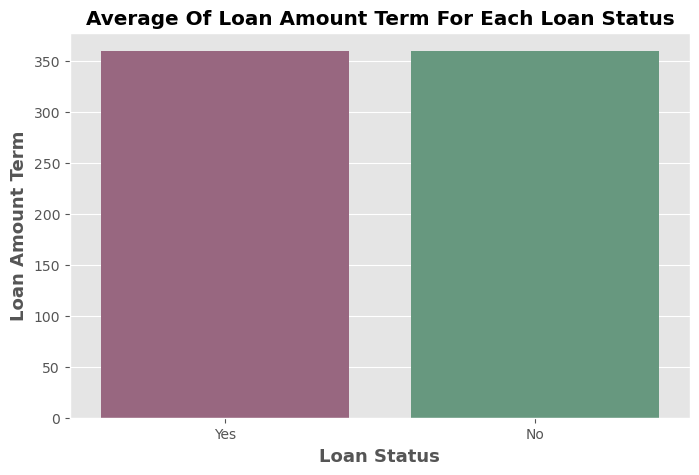

In [29]:
plt.figure(figsize = (8, 5))
sns.barplot(data = data, 
            x = 'Loan_Status',
            y = 'Loan_Amount_Term',
            estimator = np.median,
            palette = ['#A05F80', '#5FA07F'],
            ci = False)

# Add labels and title
plt.title('Average Of Loan Amount Term For Each Loan Status', weight = 'bold')
plt.xlabel('Loan Status', size = 13, weight = 'bold')
plt.ylabel('Loan Amount Term', size = 13, weight = 'bold')
plt.show()

**Observations:**
> Loan Amount Term doesn't have an impact on loan approval and rejection cases.

## 3. Multi-variate Analysis

### 3.1. What is the relation between Applicant Income and Loan Amount?

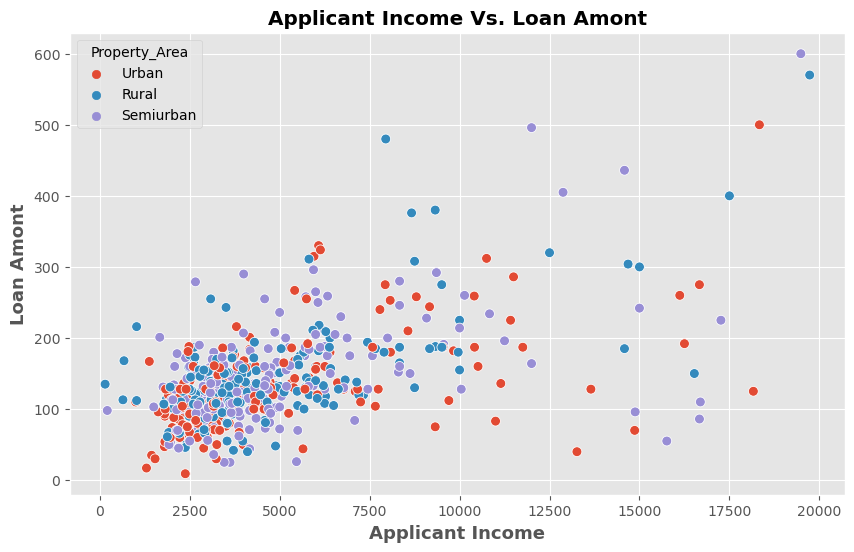

In [30]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, 
                x = 'ApplicantIncome',
                y = 'LoanAmount',
                hue = 'Property_Area',
                s = 50)

# Add labels and title
plt.title('Applicant Income Vs. Loan Amont', weight = 'bold')
plt.xlabel('Applicant Income', size = 13, weight = 'bold')
plt.ylabel('Loan Amont', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> The approved loan amount is increasing with an increase in the Total Income of the applicant(s).

>  In the majority of the cases, the Approved loan amount is less than 15K.

### 3.2. What is the relation between Loan Amount Term and Applicant Income in the Approved Loans?

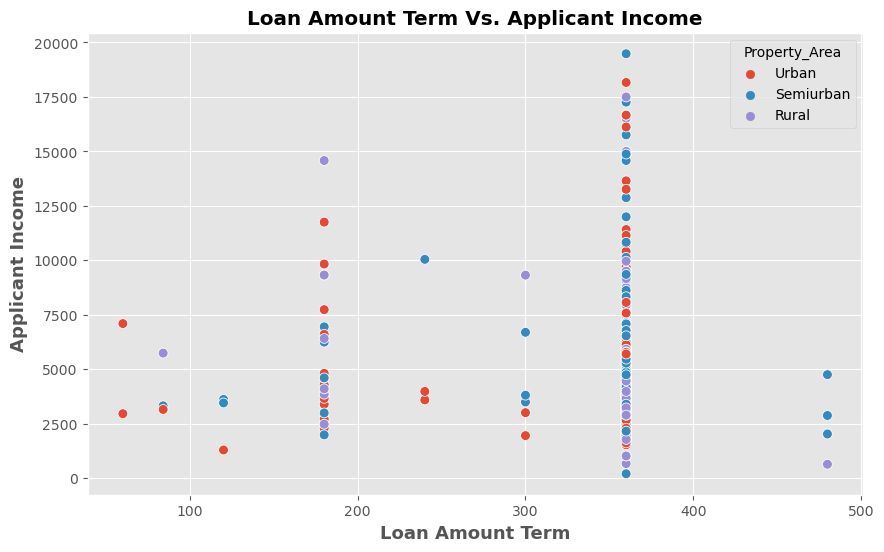

In [31]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data[data['Loan_Status'] == 'Yes'], 
                x = 'Loan_Amount_Term',
                y = 'ApplicantIncome',
                hue = 'Property_Area', 
                s = 50)

# Add labels and title
plt.title('Loan Amount Term Vs. Applicant Income', weight = 'bold')
plt.xlabel('Loan Amount Term', size = 13, weight = 'bold')
plt.ylabel('Applicant Income', size = 13, weight = 'bold')
plt.show()

**Observations:** 
> The majority of the approved loans have Term 360, followed by Term 180.

---

# Conclusions:

#### The most important features that have an impact on loan approval are `Dependents`, `Credit History`, and `Co-applicant Income`:

* **The loan approvals are more in the case of applicants who have a Credit History, no Dependents, and have Co-applicants who have a high-income.**

---

# See You In The Next Notebook